#                                              wrangling project

In [94]:
import pandas as pd
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt
import requests
import re
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer


## gathering data
> - ### from csv file(twitter-archive-enhanced) twitter archive

In [95]:
#read csv file which contain archive
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [96]:
#test
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### gathering TSV file from url download programatically

In [97]:
#download file from audicity site Tsv file and save it
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name=url.split('/')[-1]
response= requests.get(url)
if not os.path.isfile(file_name):
    with open(file_name ,'wb') as file :
        file.write(response.content)
image_predictions= pd.read_csv('image-predictions.tsv',sep='\t')

In [98]:
#test
image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. Download Tweet JSON Data

> Query the Twitter API using Python's Tweepy library to get the entire set of JSON data .

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

> - ### gathering data from json file

In [99]:
# reading data from  tweet-json file  get id ,retweet_count,favorite_count
df_json=[]
with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_json.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
        
json_api_df = pd.DataFrame(df_json)

In [100]:
#test
json_api_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Assessing
 > - #### twitter_archive

In [101]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [102]:
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [103]:
twitter_archive.shape

(2356, 17)

In [104]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [105]:
twitter_archive['tweet_id'].duplicated().sum()

0

 > - #### assessing image_prediction

In [106]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [107]:
image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [108]:
image_predictions['p1_conf'].describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [109]:
image_predictions['p2_conf'].describe()

count    2.075000e+03
mean     1.345886e-01
std      1.006657e-01
min      1.011300e-08
25%      5.388625e-02
50%      1.181810e-01
75%      1.955655e-01
max      4.880140e-01
Name: p2_conf, dtype: float64

In [110]:
image_predictions['p3_conf'].describe()

count    2.075000e+03
mean     6.032417e-02
std      5.090593e-02
min      1.740170e-10
25%      1.622240e-02
50%      4.944380e-02
75%      9.180755e-02
max      2.734190e-01
Name: p3_conf, dtype: float64

 > - #### assessing tweet_json 

In [111]:
json_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [112]:
json_api_df.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

# Assessing
### Quality issues:
#### •	Many rows containing null values and other contain word None which mean null value too.
####  •	For column name many non-name values there like (‘such', 'a', 'quite', 'not', 'one', 'incredibly', 'very')
#### •	Some value should correct manually by visual analysis (HI. MY. NAME. IS. BOOMER) to boomer name.
#### •	Validity issue we should only keep original tweet not retweet or reply to tweet.
#### •	Data type of timestamp is string so we need to change it date time.
#### •	Data type of tweet id in three data frame to string instead of int.
#### •	Data completeness the three data frames has different number of rows in twitter_archive_clean = 2097
#### number of rows in image_predictions_clean = 2075 number of rows in json_df_clean = 2354
#### •	In image prediction we assume that each 3  false prediction mean it’s not dog image, although in about 15 image it is dog .
#### •	So we will not drop any data in this table and keep it for future analysis. But in the last twitter_archive_master.csv we will keep only most confidence  and true value data and set all negative prediction to null .
#### •	After merge dog stages  we notice validity issue as for some dogs there where multiple stage by revising data we decide to keep both with comma as separator. 
#### •	 Get highest confidence with true value for dog types


###  Tidiness issues:
#### •	columns doggo,floofer,pupper,puppo is variables not column names , so we should merge them to dog_stage column.
#### •	 many columns  has ambiguous names which suppose to be rows not column





# cleaning

In [113]:
# Fisrt  making copy of data frames
twitter_archive_clean=twitter_archive.copy()
json_df_clean=json_api_df.copy()
image_predictions_clean=image_predictions.copy()

### Define
> - first drop retweet and reply 
> - by using retweeted_status_user_id to  drop retweets
> - and using in_reply_to_user_id to  drop reply
> - now time to drop columns in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
as there is no data

### Code

In [114]:
#code
#all retweet and replies contain id in cells others are null's
# So we drop all retweets and replies
index_re=twitter_archive_clean[twitter_archive_clean['retweeted_status_user_id'].notna()|twitter_archive_clean['in_reply_to_user_id'].notna() ]
twitter_archive_clean.drop(index_re.index ,inplace=True)

In [115]:
# now time to drop columns in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
# as there is no data
twitter_archive_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

### test

In [116]:
### test#test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


###  Define  
#### > - empty all cells that contain None Value from the archive

### code

In [117]:
#code 
#empty all cells that contain None Value from the archive
twitter_archive_clean.iloc[:,:]=twitter_archive_clean.iloc[:,:].replace('None','')

### test

In [118]:
#test 
twitter_archive_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,


** column "name" data **
> -    Define
> - Data start with small letter  not a dog name
> - after that with visual assessment we need to correct name manually  
This... is a Jubilant name is Jubilant id =887101392804085760
Atlas is back and this time he's prettier than the sunset. is Atlas in id=836001077879255040
HI. MY. NAME. IS. BOOMER   to Boomer   id =861288531465048066

In [119]:
#code
# get data from twitter archive that all lettre is small
lower_text=twitter_archive_clean.name.str.contains('^[a-z]', regex = True)

In [120]:
#get data into array
lower_data=twitter_archive_clean[lower_text].name.unique()
lower_data

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [121]:
# remove all wrong and none data from name columns
for low in lower_data :
    twitter_archive_clean.name=twitter_archive_clean.name.replace(low,'')

In [122]:
#after that with visual assessment we need to correct name manually
twitter_archive_clean.tweet_id=twitter_archive_clean.tweet_id.astype(str)
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='887101392804085760','name']='Jubilant'
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='836001077879255040','name']='Atlas'
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='861288531465048066','name']='Boomer'


### test

In [123]:
twitter_archive_clean[twitter_archive_clean.tweet_id=='861288531465048066']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
157,861288531465048066,2017-05-07 18:36:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HI. MY. NAME. IS. BOOMER. AND. I. WANT. TO. SA...,https://twitter.com/dog_rates/status/861288531...,13,10,Boomer,,,,


In [124]:
twitter_archive_clean[twitter_archive_clean.tweet_id=='887101392804085760']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
25,887101392804085760,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,https://twitter.com/dog_rates/status/887101392...,12,10,Jubilant,,,,


In [125]:
twitter_archive_clean[twitter_archive_clean.tweet_id=='836001077879255040']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
306,836001077879255040,2017-02-26 23:52:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas is back and this time he's prettier than...,https://twitter.com/dog_rates/status/836001077...,13,10,Atlas,,,,


In [126]:
### test#test
twitter_archive_clean.name.value_counts()

            704
Lucy         11
Charlie      11
Cooper       10
Oliver       10
           ... 
Levi          1
Lucia         1
Lenox         1
Griswold      1
Rodney        1
Name: name, Length: 931, dtype: int64

### ** Tidiness problem **
### Define
> - columns doggo,floofer,pupper,puppo is variables not column
> - define
we will replace the columns doggo,floofer,pupper,puppo into one column dog_stage
> - we notice some dogs has multible stage we check text column and ensure it's true

### code

In [127]:
#code
# for tidiness issue we will replace the columns doggo,floofer,pupper,puppo into one column dog_stage
twitter_archive_clean['dog_stage']=twitter_archive_clean['doggo']+twitter_archive_clean['floofer']+twitter_archive_clean['pupper']+twitter_archive_clean['puppo']
twitter_archive_clean['dog_stage'].value_counts()

                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [128]:
# we notice some dogs has multible stage which  doggo
twitter_archive_clean.dog_stage=twitter_archive_clean.dog_stage.replace('doggofloofer','doggo,floofer')
twitter_archive_clean.dog_stage=twitter_archive_clean.dog_stage.replace('doggopupper','doggo,pupper')
twitter_archive_clean.dog_stage=twitter_archive_clean.dog_stage.replace('doggopuppo','doggo,puppo')

### test

In [129]:
### test# test
twitter_archive_clean['dog_stage'].value_counts()

                 1761
pupper            221
doggo              72
puppo              23
doggo,pupper        9
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

In [130]:
# we notice some dogs has multible stage in text columns too
twitter_archive_clean.query('dog_stage == "doggo,pupper"')['text']

460     This is Dido. She's playing the lead role in "...
531     Here we have Burke (pupper) and Dexter (doggo)...
575     This is Bones. He's being haunted by another d...
705     This is Pinot. He's a sophisticated doggo. You...
733     Pupper butt 1, Doggo 0. Both 12/10 https://t.c...
889     Meet Maggie &amp; Lila. Maggie is the doggo, L...
956     Please stop sending it pictures that don't eve...
1063    This is just downright precious af. 12/10 for ...
1113    Like father (doggo), like son (pupper). Both 1...
Name: text, dtype: object

In [131]:
# now time to drop columns doggo,floofer,pupper,puppo
twitter_archive_clean.drop(columns=['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

In [132]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   object
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   dog_stage           2097 non-null   object
dtypes: int64(2), object(7)
memory usage: 163.8+ KB


In [133]:
id_check=twitter_archive_clean.tweet_id.apply(str)
id_check.str.isnumeric().sum()

2097

In [134]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   object
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   dog_stage           2097 non-null   object
dtypes: int64(2), object(7)
memory usage: 163.8+ KB


** completeness problem **
> - 3 images in archive without url

In [135]:
asa = twitter_archive_clean[twitter_archive_clean.expanded_urls.isna()]
asa['tweet_id']

375     828361771580813312
707     785515384317313025
1445    696518437233913856
Name: tweet_id, dtype: object

In [136]:
image_predictions_clean.tweet_id.isin(asa['tweet_id']).sum()

0

### ** wrong DataType **
> - timestamp in archive need to change to date time

### code

In [137]:
#Code
#change data type of timestamp to date
twitter_archive_clean.timestamp=pd.to_datetime(twitter_archive_clean.timestamp)

### test

In [138]:
#test
twitter_archive_clean.timestamp.dtypes

datetime64[ns, UTC]

### *compare tweet_id in the three tabels*
### Define
> - change type of three tabels tweet _id to string


### code

In [139]:
twitter_archive_clean.tweet_id=twitter_archive_clean.tweet_id.astype(str)
image_predictions_clean.tweet_id=image_predictions_clean.tweet_id.astype(str)
json_df_clean.tweet_id=json_df_clean.tweet_id.astype(str)

### test

In [140]:
twitter_archive_clean.tweet_id.describe()

count                   2097
unique                  2097
top       671533943490011136
freq                       1
Name: tweet_id, dtype: object

In [141]:
image_predictions_clean.tweet_id.describe()

count                   2075
unique                  2075
top       749395845976588288
freq                       1
Name: tweet_id, dtype: object

In [142]:
json_df_clean.tweet_id.describe()

count                   2354
unique                  2354
top       671533943490011136
freq                       1
Name: tweet_id, dtype: object

### Define
> - number of rows in twitter_archive_clean = 2097
> - number of rows in image_predictions_clean = 2075
> - number of rows in json_df_clean = 2354
> - the difference between  archive and image prediction 104 id for retweet and tweet reply
> - we need drop un complete tweets and that for retweet from all tabels

### Code

In [143]:
#investigate whitch 
#number of tweet whitch in image and archive 
image_predictions_clean.tweet_id.isin(twitter_archive_clean.tweet_id).sum()

1971

In [144]:
#number of tweet whitch in image and json file 
image_predictions_clean.tweet_id.isin(json_df_clean.tweet_id).sum()

2073

In [145]:
#number of tweet whitch in json file and archive 
json_df_clean.tweet_id.isin(twitter_archive_clean.tweet_id).sum()

2097

In [146]:
# transfer tweet id in archive and image to numpy array to compare and get difference between two tabels
image_tweet_id=image_predictions_clean['tweet_id'].to_numpy()
archive_tweet_id=twitter_archive_clean.tweet_id.to_numpy()
json_tweet_id=json_df_clean.tweet_id.to_numpy()

In [147]:
diff_image_archive=[]
for id_t in image_tweet_id :
    if(id_t not in archive_tweet_id):
        diff_image_archive.append(id_t)
len(diff_image_archive)

104

In [148]:
# we get the default tweet id for all tabels
default_data_for_all=image_predictions_clean.tweet_id[image_predictions_clean.tweet_id.isin(twitter_archive_clean.tweet_id)].to_numpy()

In [149]:
len(default_data_for_all)

1971

In [150]:
# Drop data from other tabels
#twitter_archive_clean=twitter_archive_clean.set_index("tweet_id")
#twitter_archive_clean=twitter_archive_clean.drop(default_data_for_all,axis=0)
archive_tweet_id

array(['892420643555336193', '892177421306343426', '891815181378084864',
       ..., '666033412701032449', '666029285002620928',
       '666020888022790149'], dtype=object)

In [151]:
# get default id only from archive
diff_archive=[]
for id_t in archive_tweet_id :
       if(id_t not in default_data_for_all):
        diff_archive.append(id_t)
     #   print(id_t)
len(diff_archive)

126

In [152]:
# Drop data from twitter_archive_clean tabels
twitter_archive_clean=twitter_archive_clean.set_index("tweet_id")
twitter_archive_clean=twitter_archive_clean.drop(diff_archive,axis=0)

In [153]:
# get default id only from image
diff_image=[]
for id_t in image_tweet_id :
       if(id_t not in default_data_for_all):
        diff_image.append(id_t)
     #   print(id_t)
len(diff_image)

104

In [154]:
len(image_tweet_id)

2075

In [155]:
# Drop data from image_predictions_clean tabels
image_predictions_clean=image_predictions_clean.set_index("tweet_id")
image_predictions_clean=image_predictions_clean.drop(diff_image,axis=0)

In [156]:
# get default id only from json
diff_json=[]
for id_t in json_tweet_id :
       if(id_t not in default_data_for_all):
        diff_json.append(id_t)
     #   print(id_t)
len(diff_json)

383

In [157]:
# Drop data from image_predictions_clean tabels
json_df_clean=json_df_clean.set_index("tweet_id")
json_df_clean=json_df_clean.drop(diff_json,axis=0)


In [158]:
#reset index 
json_df_clean=json_df_clean.reset_index()
image_predictions_clean=image_predictions_clean.reset_index()
twitter_archive_clean=twitter_archive_clean.reset_index()

### test

In [159]:
#test drop rows from image_predictions_clean file

image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1971 non-null   object 
 1   jpg_url   1971 non-null   object 
 2   img_num   1971 non-null   int64  
 3   p1        1971 non-null   object 
 4   p1_conf   1971 non-null   float64
 5   p1_dog    1971 non-null   bool   
 6   p2        1971 non-null   object 
 7   p2_conf   1971 non-null   float64
 8   p2_dog    1971 non-null   bool   
 9   p3        1971 non-null   object 
 10  p3_conf   1971 non-null   float64
 11  p3_dog    1971 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 144.5+ KB


In [160]:
#test drop rows from json file
json_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        1971 non-null   object
 1   retweet_count   1971 non-null   int64 
 2   favorite_count  1971 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 46.3+ KB


In [161]:
#test drop rows from archive file

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   dog_stage           1971 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 138.7+ KB


### ** solve tidiness in image prediction **
### Define
> - many columns has ambiguous names which suppose to be rows not columns
> - first rename columns name in order to remove ambiguous
> - then merge those 9 columns in just 3

In [162]:
image_predictions_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
358,672834301050937345,https://pbs.twimg.com/media/CVZjOktVAAAtigw.jpg,1,Pembroke,0.582560,True,Cardigan,0.258869,True,nipple,0.033835,False
1751,837471256429613056,https://pbs.twimg.com/media/C59LpELWUAEUmYh.jpg,1,Norwegian_elkhound,0.976255,True,keeshond,0.013990,True,seat_belt,0.002111,False
324,672068090318987265,https://pbs.twimg.com/media/CVOqW8eUkAESTHj.jpg,1,pug,0.863385,True,shopping_cart,0.125746,False,Border_terrier,0.002972,True
1770,842163532590374912,https://pbs.twimg.com/media/C6_3QgMWsAMNnAk.jpg,2,French_bulldog,0.891227,True,soccer_ball,0.022811,False,bull_mastiff,0.012852,True
915,703041949650034688,https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg,1,hippopotamus,0.581403,False,doormat,0.152445,False,sea_lion,0.026364,False
1928,882992080364220416,https://pbs.twimg.com/media/DEEEnIqXYAAiJh_.jpg,1,Eskimo_dog,0.466778,True,Siberian_husky,0.406044,True,dingo,0.073414,False
1319,759197388317847553,https://pbs.twimg.com/media/Cok1_sjXgAU3xpp.jpg,1,kuvasz,0.511341,True,golden_retriever,0.076899,True,white_wolf,0.063269,False
1152,736736130620620800,https://pbs.twimg.com/media/CjlpmZaUgAED54W.jpg,1,schipperke,0.545502,True,groenendael,0.298622,True,Labrador_retriever,0.030986,True
872,699072405256409088,https://pbs.twimg.com/ext_tw_video_thumb/69907...,1,Shih-Tzu,0.599587,True,Pekinese,0.213069,True,Maltese_dog,0.154293,True
129,668297328638447616,https://pbs.twimg.com/media/CUZE4IWW4AAZmDf.jpg,1,king_penguin,0.606747,False,ice_bear,0.264221,False,Eskimo_dog,0.032784,True


### Code

In [163]:
# Coding
# rename columns 

cols = ['tweet_id','jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
image_predictions_clean.columns=cols
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweet_id      1971 non-null   object 
 1   jpg_url       1971 non-null   object 
 2   img_num       1971 non-null   int64  
 3   prediction_1  1971 non-null   object 
 4   confidence_1  1971 non-null   float64
 5   breed_1       1971 non-null   bool   
 6   prediction_2  1971 non-null   object 
 7   confidence_2  1971 non-null   float64
 8   breed_2       1971 non-null   bool   
 9   prediction_3  1971 non-null   object 
 10  confidence_3  1971 non-null   float64
 11  breed_3       1971 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 144.5+ KB


In [164]:
temp_img_pred=image_predictions_clean
temp_img_pred

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1966,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
1967,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
1968,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
1969,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [165]:
# Merging the 9 columns in 3 columns
image_predictions_clean=pd.wide_to_long(image_predictions_clean, stubnames=['prediction','confidence','breed'], i=['tweet_id','jpg_url','img_num'], j="prediction_level",sep="_").reset_index()

### test

In [168]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


### ** Make copy of image prediction to merge in last file **
> - To reduce data redundancy we only get statistical the best confidence and true prediction
 and at the same time we will keep file image prediction for future analysis as i notice that there some false values is for dogs by visual assessment.

In [169]:
# first i will make all false pridiction to 0 and clear level and dog predction i need only high confidence true values
test=image_predictions_clean.copy()
test.loc[test.breed==False,'confidence']=0
test.loc[test.breed==False,'prediction']=''
test.loc[test.breed==False,'prediction_level']=''
#get high confidence true values as i excluded false values.
idx=test.groupby(['tweet_id'])['confidence'].transform(max)==test['confidence']
test1=test[idx]
#drop duplicate false values with 0 confidence to keep the same number of observations
test1.drop_duplicates()

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
6,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German_shepherd,0.596461,True
9,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,Rhodesian_ridgeback,0.408143,True
12,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,1,miniature_pinscher,0.560311,True
...,...,...,...,...,...,...,...
5898,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,1,basset,0.555712,True
5902,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,2,Labrador_retriever,0.168086,True
5904,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,1,Chihuahua,0.716012,True
5907,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1,Chihuahua,0.323581,True


### test

In [170]:
test1

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
6,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German_shepherd,0.596461,True
9,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,Rhodesian_ridgeback,0.408143,True
12,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,1,miniature_pinscher,0.560311,True
...,...,...,...,...,...,...,...
5904,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,1,Chihuahua,0.716012,True
5907,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1,Chihuahua,0.323581,True
5910,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,,,0.000000,False
5911,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,,,0.000000,False


In [171]:
test1

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
6,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German_shepherd,0.596461,True
9,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,Rhodesian_ridgeback,0.408143,True
12,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,1,miniature_pinscher,0.560311,True
...,...,...,...,...,...,...,...
5904,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,1,Chihuahua,0.716012,True
5907,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1,Chihuahua,0.323581,True
5910,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,,,0.000000,False
5911,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,,,0.000000,False


### Define
> - Merge all Data to  create twitter_archive_master.csv last file

### code

In [172]:
#merge all data frames
cleaned_data=pd.merge(twitter_archive_clean,test1,on='tweet_id', how = 'inner')
cleaned_data=pd.merge(cleaned_data,json_df_clean,on='tweet_id', how = 'inner')

### test

In [173]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2581 entries, 0 to 2580
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2581 non-null   object             
 1   timestamp           2581 non-null   datetime64[ns, UTC]
 2   source              2581 non-null   object             
 3   text                2581 non-null   object             
 4   expanded_urls       2581 non-null   object             
 5   rating_numerator    2581 non-null   int64              
 6   rating_denominator  2581 non-null   int64              
 7   name                2581 non-null   object             
 8   dog_stage           2581 non-null   object             
 9   jpg_url             2581 non-null   object             
 10  img_num             2581 non-null   int64              
 11  prediction_level    2581 non-null   object             
 12  prediction          2581 non-null 

### Define
> - create twitter_archive_master.csv last file

In [174]:
#THE FINAL FILE
cleaned_data.to_csv('twitter_archive_master.csv',index=0)
image_predictions_clean.to_csv('image_predictions_clean.csv',index=0)

In [175]:
###  do some statics work for analysis process
image_predictions_clean

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True
...,...,...,...,...,...,...,...
5908,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,2,Pekinese,0.090647,True
5909,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,3,papillon,0.068957,True
5910,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,1,orange,0.097049,False
5911,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,2,bagel,0.085851,False


In [176]:
top_15_dog=cleaned_data[cleaned_data['prediction']!=''].prediction.value_counts().head(15)
top_15_dog

golden_retriever            156
Labrador_retriever          106
Pembroke                     94
Chihuahua                    90
pug                          62
toy_poodle                   50
chow                         48
Samoyed                      42
Pomeranian                   41
malamute                     33
Chesapeake_Bay_retriever     31
French_bulldog               31
cocker_spaniel               30
miniature_pinscher           24
Eskimo_dog                   22
Name: prediction, dtype: int64

In [177]:
cleaned_data.prediction.describe()

count     2581
unique     114
top           
freq       915
Name: prediction, dtype: object

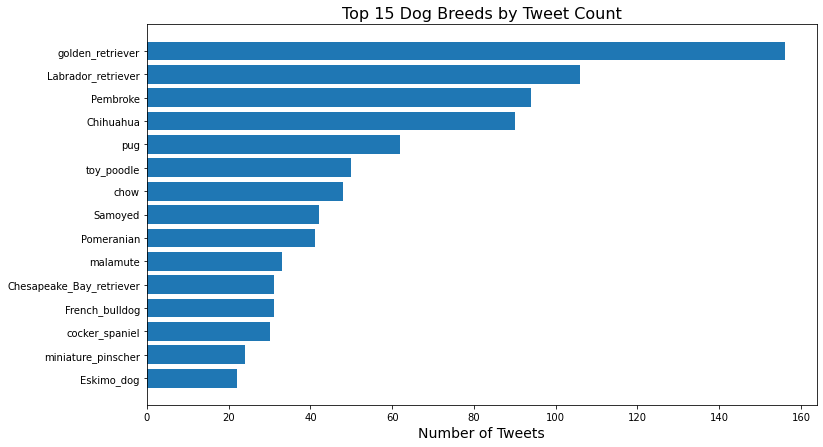

In [178]:
plt.figure(figsize=(12, 7))
plt.barh(top_15_dog.index,top_15_dog)
plt.xlabel('Number of Tweets', fontsize = 14)
plt.title('Top 15 Dog Breeds by Tweet Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();



In [179]:
#favorite_d==x
#top_stage=cleaned_data.groupby([cleaned_data['dog_stage']!= ''].favorite_count.sum()
top_stage=cleaned_data.groupby(['dog_stage'])['favorite_count'].sum()
top_stage=top_stage[1:8]
type(top_stage)
top_stage=top_stage.sort_values()


In [180]:
top_stage.describe()

count    7.000000e+00
mean     6.029369e+05
std      7.783103e+05
min      1.716900e+04
25%      7.014300e+04
50%      1.232290e+05
75%      1.042944e+06
max      1.853986e+06
Name: favorite_count, dtype: float64

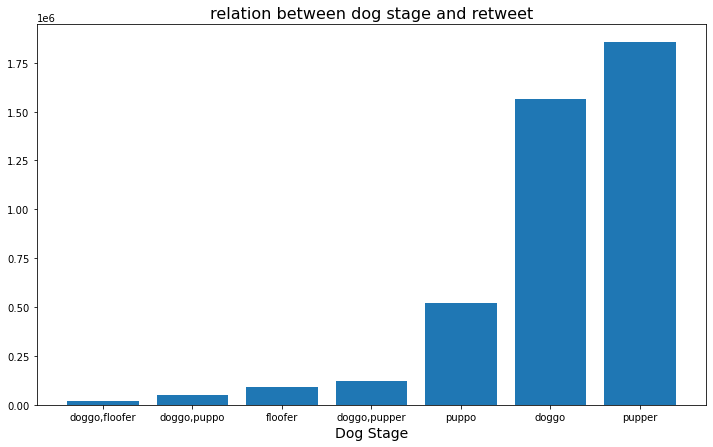

In [181]:
plt.figure(figsize=(12, 7))
plt.bar(top_stage.index,top_stage.array)
plt.xlabel('Dog Stage', fontsize = 14)
plt.title('relation between dog stage and retweet', fontsize = 16)
#plt.gca().invert_yaxis()
plt.show();


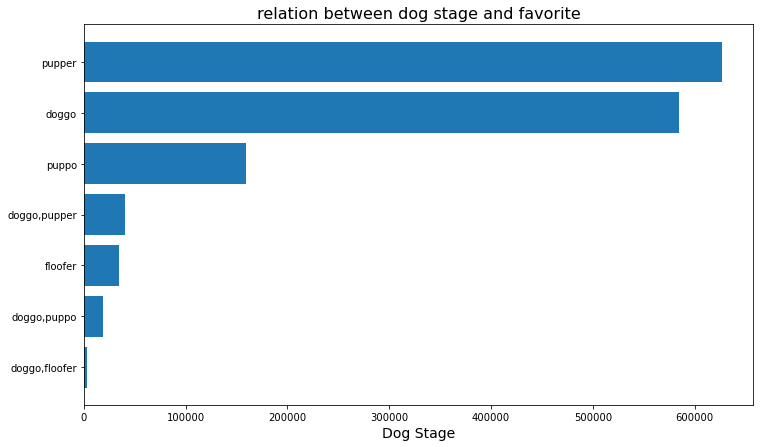

In [182]:
top_stage=cleaned_data.groupby(['dog_stage'])['retweet_count'].sum()
top_stage=top_stage[1:8]
type(top_stage)
top_stage=top_stage.sort_values()
plt.figure(figsize=(12, 7))
plt.barh(top_stage.index,top_stage.array)
plt.xlabel('Dog Stage', fontsize = 14)
plt.title('relation between dog stage and favorite', fontsize = 16)
#plt.gca().invert_yaxis()
plt.show();


In [183]:
top_stage=cleaned_data[cleaned_data['rating_numerator'] < 15 ].groupby('rating_numerator')['retweet_count'].sum()
top_stage=top_stage[5:]
top_stage

rating_numerator
5       89507
6       62476
7      123331
8      150695
9      149276
10     843968
11    1081135
12    1545149
13    2199406
14     571040
Name: retweet_count, dtype: int64

In [184]:
cleaned_data.rating_numerator.describe()

count    2581.000000
mean       13.301046
std        62.419757
min         0.000000
25%         9.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

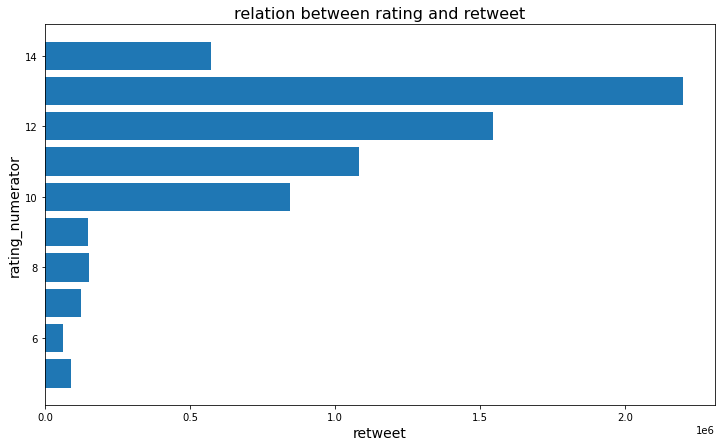

In [185]:
type(top_stage)
top_stage=top_stage.sort_values()
plt.figure(figsize=(12, 7))
plt.barh(top_stage.index,top_stage.array)
plt.xlabel('retweet', fontsize = 14)
plt.ylabel('rating_numerator', fontsize = 14)

plt.title('relation between rating and retweet', fontsize = 16)
#plt.gca().invert_yaxis()
plt.show();
